# Data Preprocessing

### Load the Data

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('Loan_Default.csv')

# View data summary
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

### Handle Missing Values

In [2]:
print(data.isnull().sum())

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [3]:
data.dropna(how='any', inplace=True)  # Drop rows with Null value

### Encode Categorical Variables

In [4]:
data = pd.get_dummies(data, drop_first=True) # Convert non-numeric columns to numeric

### Normalize/Scale Data

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Feature Selection

### Correlation Analysis

<Axes: >

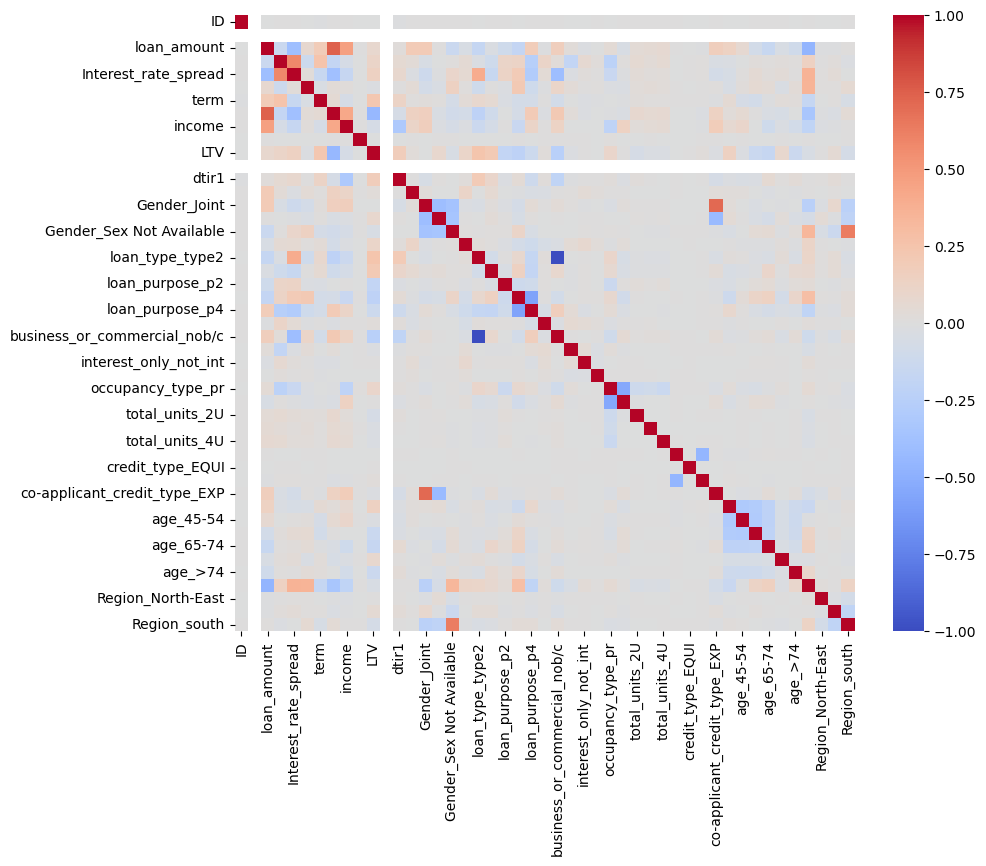

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')

### Feature Importance Using Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop('Status', axis=1)
y = data['Status']
model = RandomForestClassifier()
model.fit(X, y)

# Feature importance
importance = pd.Series(model.feature_importances_, index=X.columns)
print(importance.sort_values(ascending=False))

ID                                   0.0
credit_type_EXP                      0.0
interest_only_not_int                0.0
lump_sum_payment_not_lpsm            0.0
occupancy_type_pr                    0.0
occupancy_type_sr                    0.0
total_units_2U                       0.0
total_units_3U                       0.0
total_units_4U                       0.0
credit_type_CRIF                     0.0
credit_type_EQUI                     0.0
co-applicant_credit_type_EXP         0.0
year                                 0.0
age_35-44                            0.0
age_45-54                            0.0
age_55-64                            0.0
age_65-74                            0.0
age_<25                              0.0
age_>74                              0.0
submission_of_application_to_inst    0.0
Region_North-East                    0.0
Region_central                       0.0
Neg_ammortization_not_neg            0.0
business_or_commercial_nob/c         0.0
Credit_Worthines

# Model Development

### Split Data into Training and Testing Sets

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train Machine Learning Models

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Save the Model for Future Use

In [10]:
import joblib

joblib.dump(model, 'loan_default_model.pkl')


['loan_default_model.pkl']

# Model Evaluation

### Evaluate Performance Metrics

In [11]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0


IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
print(data['Status'].value_counts())


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [ ]:
print(data.head())  # Inspect the dataset


# Bonus: Tableau Dashboard